<h1 align='center'>  Bangalore Air Quality Prediction </h1>
<h3 align='center'>  To predict the Air Quality of Bangalore City from 2013-2018 </h3>

## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Display all the columns/rows of the DataFrame.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Loading the required Data

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [3]:
print('Dimensionality of the obtained Data is: ', df.shape)

Dimensionality of the obtained Data is:  (737, 8)


## 2. Feature Engineering

In [4]:
# Understanding more about the missing value columns

def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()

    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1) 

    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataset has 8 columns and 737 observations.

 There are 1 columns that have missing values.


,Missing Values,% of Total Values
PM 2.5,1,0.1


In [5]:
## Dropping the Null Values
df = df.dropna()

In [6]:
## Splitting our Data to Dependent and Independent Features
X = df.iloc[:,:-1] ### Independent Features
y = df.iloc[:,-1] ### Dependent Features

## 3. Comparing Linear, Ridge and Lasso Regression

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

### 3.1 Linear Regression Model

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg = LinearRegression()        ## Initialize Linear Regression.
mse = cross_val_score(lin_reg, X_train, y_train, scoring= 'neg_mean_squared_error', cv= 5)
mean_mse = np.mean(mse)
print(mean_mse)

-4469.5506911236025


### 3.2 Ridge Regression Model

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV        ## To obtain the optimal Lambda value.

In [19]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 8, 10, 15, 20, 30, 35, 40]}     ## Lambda can be any positive number.
ridge_reg = GridSearchCV(ridge, param_grid= parameters, scoring= 'neg_mean_squared_error', cv= 5)
ridge_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 8, 10, 15, 20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [20]:
print('Best Alpha value: ', ridge_reg.best_params_)
print('Best Score (MSE): ', ridge_reg.best_score_)

Best Alpha value:  {'alpha': 40}
Best Score (MSE):  -4456.011822992436


### 3.3 Lasso Regression Model

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV        ## To obtain the optimal Lambda value.

In [21]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 8, 10, 15, 20, 30, 35, 40]}     ## Lambda can be any positive number.
lasso_reg = GridSearchCV(lasso, param_grid= parameters, scoring= 'neg_mean_squared_error', cv= 5)
lasso_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 8, 10, 15, 20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [22]:
print('Best Alpha value: ', lasso_reg.best_params_)
print('Best Score (MSE): ', lasso_reg.best_score_)

Best Alpha value:  {'alpha': 5}
Best Score (MSE):  -4429.974047782635


### Model Evaluation

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

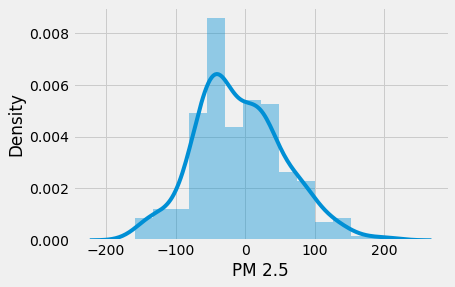

In [23]:
## Predict
prediction = lasso_reg.predict(X_test)
sns.distplot(y_test-prediction)

- ### The difference between y_test and the prediction is almost a bell curve. Thus it is almost Gaussian.

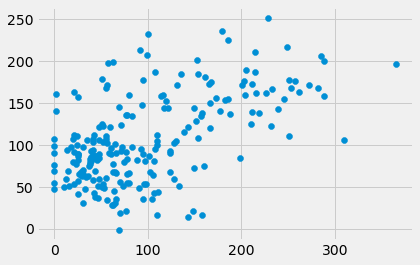

In [24]:
plt.scatter(y_test, prediction)

## Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

### Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.



In [25]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  51.68769906863978
MSE:  4065.0328838238293
RMSE:  63.75761039926002


In [26]:
import pickle

## Open a file, where we want to store the data.
file = open('lasso_regression_model.pkl', 'wb')

## Dump all the information to this file.
pickle.dump(lasso_reg, file)